# TITLE: Visualizing Earnings Based On College Majors

INTRODUCTION: We will be dealing with a report on the job results of students who graduated from college between 2010 and 2012. The initial data on job results was published by the American Community Survey, which performs surveys and aggregates data. FiveThirtyEight cleaned the dataset and uploaded it to their Github folder.
That row in the dataset represents different major in college which provides information on gender equality, job rates, median incomes and more. Below are only a few columns in the dataset:
<br> -  Rank - Rank by median earnings (the dataset is ordered by this column).
<br> - Major_code - Major code.
<br> - Major - Major description.
<br> - Major_category - Category of major.
<br> - Total - Total number of people with major.
<br> - Sample_size - Sample size (unweighted) of full-time.
<br> - Men - Male graduates.
<br> - Women - Female graduates.
<br> - ShareWomen - Women as share of total.
<br> - Employed - Number employed.
<br> - Median - Median salary of full-time, year-round workers.
<br> - Low_wage_jobs - Number in low-wage service jobs.
<br> - Full_time - Number employed 35 hours or more.
<br> - Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

In [2]:
recent_grads = pd.read_csv("recent-grads.csv",)
recent_grads.iloc[0]
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

There are originally 173 rows in this dataset. However, we will be dropping rows that has one of its cells empty without any value.

In [4]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.iloc[:, 0].count()
cleaned_data_count


172

Only one row contained missing value, so we have 172 rows to deal with

Text(0.5, 1.0, 'Median vs. Sample size')

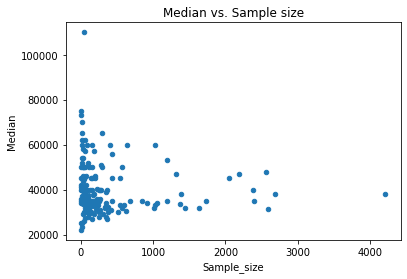

In [5]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Median vs. Sample size')

Text(0.5, 1.0, 'Unemployment rate vs sample size')

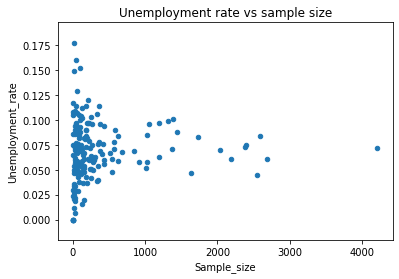

In [6]:
ax2 = recent_grads.plot(x = "Sample_size", y = "Unemployment_rate", kind = "scatter")
ax2.set_title("Unemployment rate vs sample size")

Text(0.5, 1.0, 'Full_time vs Median')

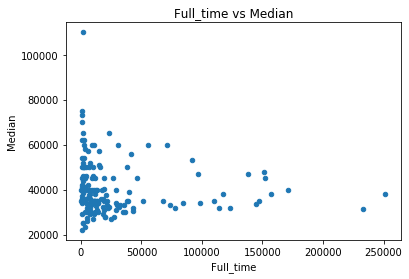

In [7]:
ax3 = recent_grads.plot(x = "Full_time", y = "Median", kind = "scatter")
ax3.set_title("Full_time vs Median")

Text(0.5, 1.0, 'Unemployment rate vs Sharewomen')

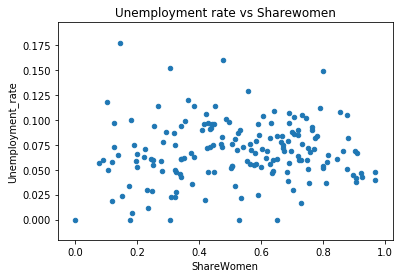

In [8]:
ax4 = recent_grads.plot(x = "ShareWomen", y = "Unemployment_rate", kind = "scatter")
ax4.set_title("Unemployment rate vs Sharewomen")

Text(0.5, 1.0, 'Median vs Men')

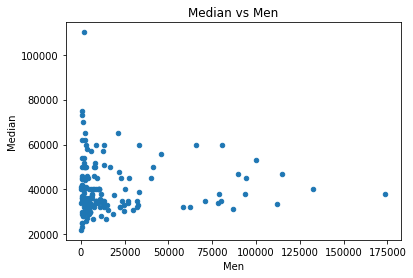

In [9]:
ax5 = recent_grads.plot(x = "Men", y = "Median", kind = "scatter")
ax5.set_title("Median vs Men")

Text(0.5, 1.0, 'Median vs Women')

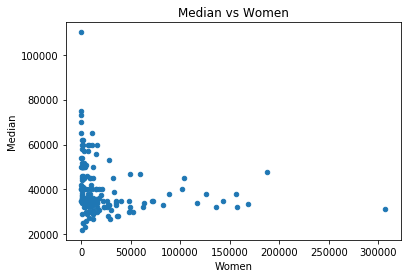

In [10]:
ax6 = recent_grads.plot(x = "Women", y = "Median", kind = "scatter")
ax6.set_title("Median vs Women")

As visualized above, we realise that students in popular major does not translate to a higher median salary. Students that specialized in a subjects that were majority femail does not more salary than subjects with minority females. There is no link between the full time employees and the median salary that they earn.

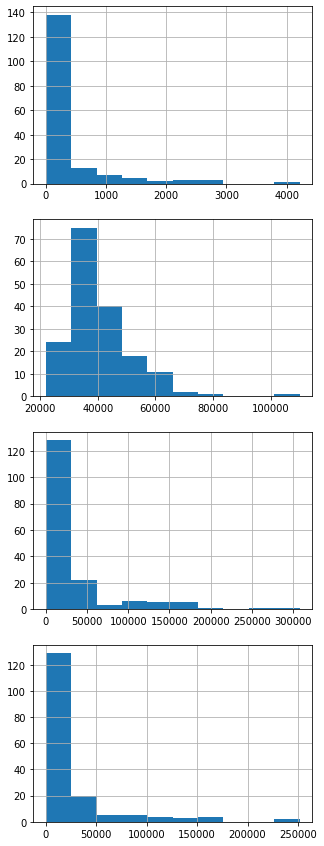

In [11]:
values = (["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
           "Unemployment_rate", "Men", "Women"]
         )

fig = plt.figure(figsize=(5,15))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[values[r-1]].hist(bins = 10)

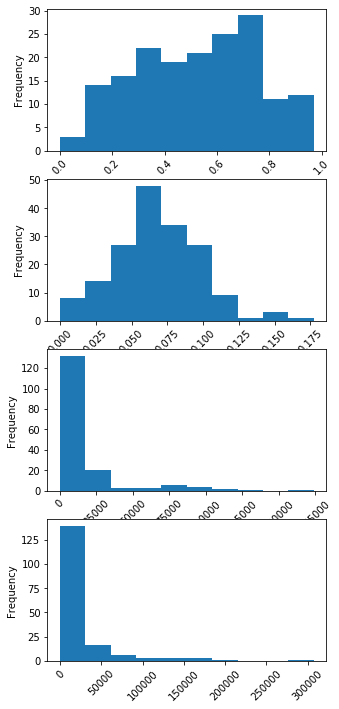

In [12]:
values = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

hey = plt.figure(figsize = (5, 12))
for r in range(4, 8):
    ax = hey.add_subplot(4,1, (r-3))
    ax = recent_grads[values[r]].plot(kind = "hist", rot = 45)

From the second Histogram which reperesents the Median salary of the professions, we can conclude that the most common salary ranges from 30,000 to 40,000

In [13]:
pd.cut(recent_grads["ShareWomen"], bins = 10).value_counts(ascending = False)

(0.678, 0.775]         29
(0.581, 0.678]         25
(0.291, 0.388]         22
(0.484, 0.581]         21
(0.388, 0.484]         19
(0.194, 0.291]         16
(0.0969, 0.194]        14
(0.872, 0.969]         12
(0.775, 0.872]         11
(-0.000969, 0.0969]     3
Name: ShareWomen, dtype: int64

From the fourth Histogram, which shows the ShareWomen data and reperesents the percentage of women in of each major, we realize that there are 5 different categories above the 50 percents. The numbers of Majors in this category are 98 according to the frequency table above. Therefore, 98 Majors are prdominantly female and 74 majors are predominantly male

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1182b66d0>,
      dtype=object)

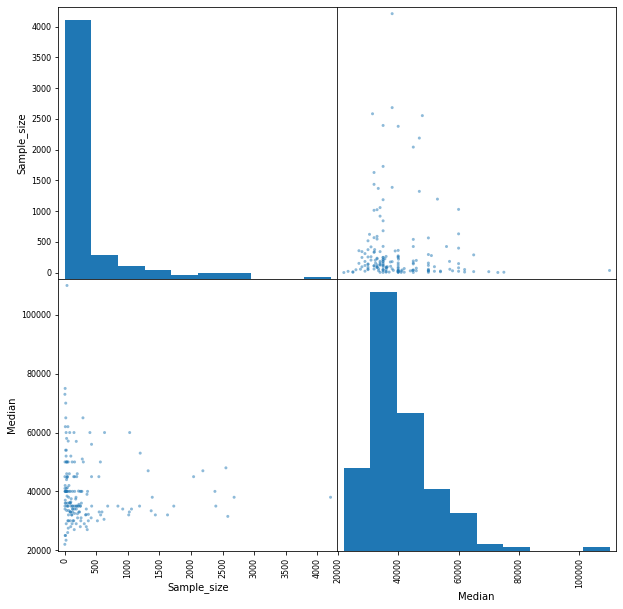

In [14]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize =(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118811410>,
      dtype=object)

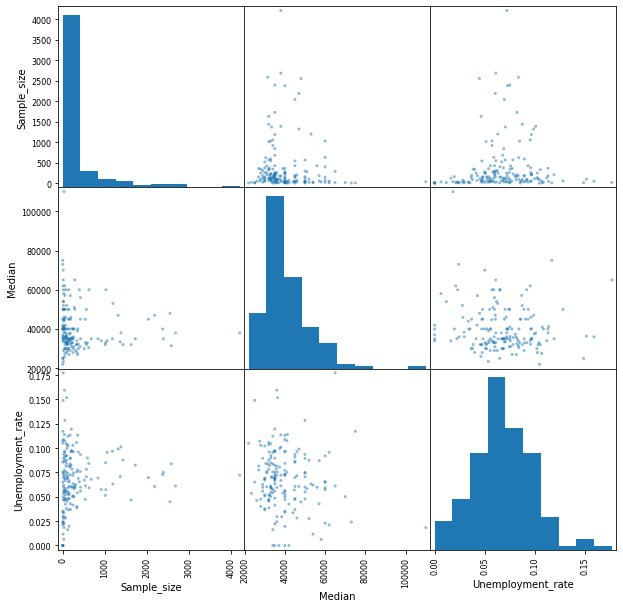

In [15]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize =(10,10))

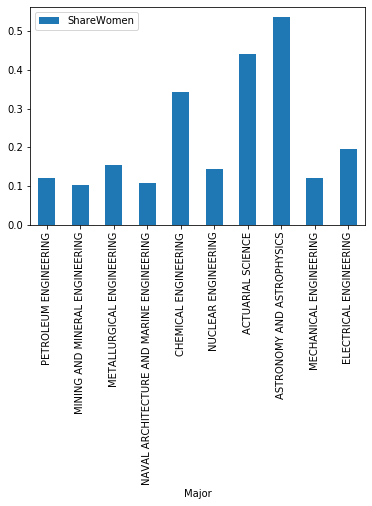

In [16]:
recent_grads[:10].plot.bar(x= 'Major', y="ShareWomen")

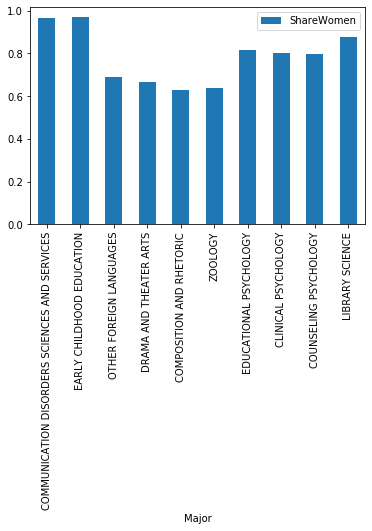

In [17]:
recent_grads[-10:].plot.bar(x= 'Major', y="ShareWomen")

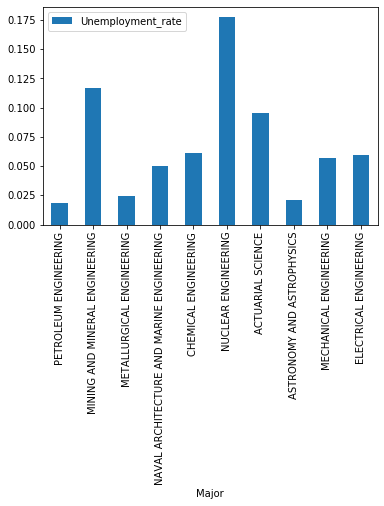

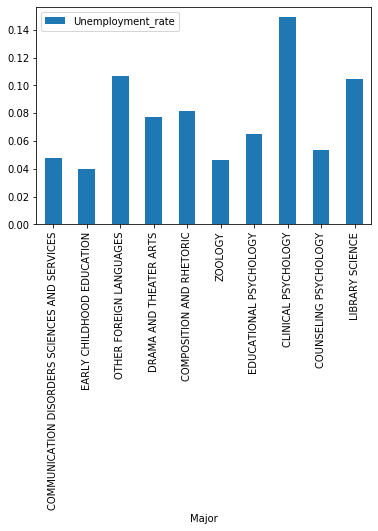

In [18]:
recent_grads[:10].plot.bar(x= 'Major', y="Unemployment_rate")
recent_grads[-10:].plot.bar(x= 'Major', y="Unemployment_rate")

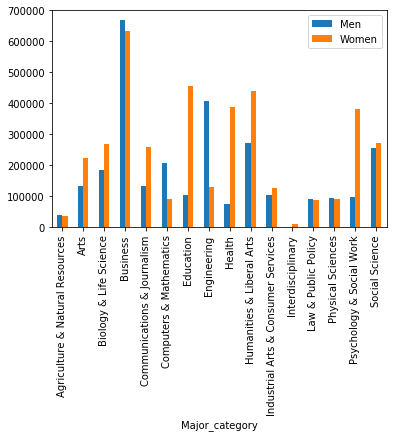

In [19]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar()

# Using a box plot to explore the distributions of median salaries and unemployment rate.

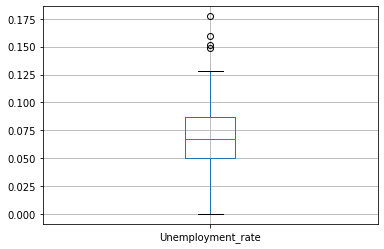

In [20]:
recent_grads.boxplot(column = ["Unemployment_rate"])

Text(0.5, 0, 'Median Salary')

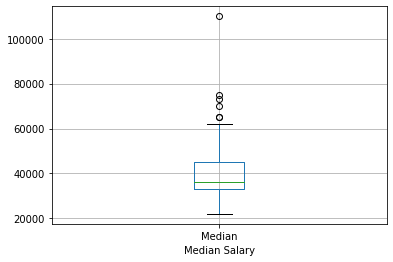

In [21]:
recent_grads.boxplot(column = ["Median"]).set_xlabel('Median Salary')

As Visualized above, Average salary earned is between 30,000 to 40,000 and the average unemployment rate is between 6 percent to 8 percent 

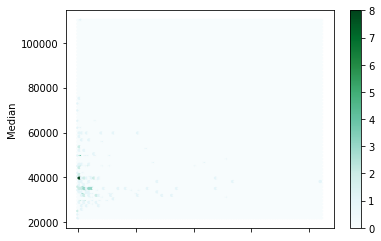

In [22]:
recent_grads.plot.hexbin(x = 'Sample_size', y = 'Median')